# Part I - (Dataset Exploration of Prosper Loan Dataset)
## by (Omolayo Ipinsanmi)

## Introduction

The loan dataset by prosper contains 81 variables with 113,937 entries. the variables includes  loan amount, borrower rate or interest rate, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn and many others.
This [link](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) to the data dictionary contains more details about the dataset.



## Preliminary Wrangling

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
#load the dataset
df_loan= pd.read_csv('prosperLoanData.csv') 

In [5]:
#view the first five entries
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
#list the variables
list(df_loan.columns)

['ListingKey',
 'ListingNumber',
 'ListingCreationDate',
 'CreditGrade',
 'Term',
 'LoanStatus',
 'ClosedDate',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'GroupKey',
 'DateCreditPulled',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (p

**Not all the 81 variables listed are needed for this exploration, so we need to select the variables of  interest**

In [7]:
#select needed variables
feats = ['LoanOriginalAmount', 'Occupation', 'BorrowerAPR', 'StatedMonthlyIncome', 'BorrowerState','Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus','MonthlyLoanPayment','BorrowerRate']
df_new= df_loan[feats]

In [8]:
df_new.head()

,LoanOriginalAmount,Occupation,BorrowerAPR,StatedMonthlyIncome,BorrowerState,Term,ProsperRating (Alpha),EmploymentStatus,MonthlyLoanPayment,BorrowerRate
0,9425,Other,0.16516,3083.333333,CO,36,NaN,Self-employed,330.43,0.1580
1,10000,Professional,0.12016,6125.000000,CO,36,A,Employed,318.93,0.0920
2,3001,Other,0.28269,2083.333333,GA,36,NaN,Not available,123.32,0.2750
3,10000,Skilled Labor,0.12528,2875.000000,GA,36,A,Employed,321.45,0.0974
4,15000,Executive,0.24614,9583.333333,MN,36,D,Employed,563.97,0.2085


In [9]:
# high-level overview of new dataset
print(df_new.shape)
print(df_new.dtypes)
print(df_new.head(10))

(113937, 10)
LoanOriginalAmount         int64
Occupation                object
BorrowerAPR              float64
StatedMonthlyIncome      float64
BorrowerState             object
Term                       int64
ProsperRating (Alpha)     object
EmploymentStatus          object
MonthlyLoanPayment       float64
BorrowerRate             float64
dtype: object
   LoanOriginalAmount      Occupation  BorrowerAPR  StatedMonthlyIncome  \
0                9425           Other      0.16516          3083.333333   
1               10000    Professional      0.12016          6125.000000   
2                3001           Other      0.28269          2083.333333   
3               10000   Skilled Labor      0.12528          2875.000000   
4               15000       Executive      0.24614          9583.333333   
5               15000    Professional      0.15425          8333.333333   
6                3000  Sales - Retail      0.31032          2083.333333   
7               10000         Laborer      

In [10]:
# Remove loans with missing borrower APR information
df_new_clean = df_new[~df_new.BorrowerAPR.isna()]
df_new_clean.shape

(113912, 10)

In [11]:
df_new_clean.isnull().sum()

LoanOriginalAmount           0
Occupation                3563
BorrowerAPR                  0
StatedMonthlyIncome          0
BorrowerState             5490
Term                         0
ProsperRating (Alpha)    29059
EmploymentStatus          2230
MonthlyLoanPayment           0
BorrowerRate                 0
dtype: int64

### Dataset structure
The dataset contains 81 features of which ten were selected for this project. Of the ten selected, loan original amount and term are int64 data type, Occupation, BorrowerState, ProsperRating (Alpha) and EmploymentStatus are object type data while the remaining 4, BorrowerAPR, StatedMonthlyIncome, MonthlyLoanPayment and BorrowerRate are floats data type. The objects data are categorical data.



### What is/are the main feature(s) of interest in your dataset?
I am interested in how the borrowers APR is affected by the feautures listed.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will look into the term, loan original amount, employment status and MonthlyLoanPayment as I expect these features to have some levels of correlation with borrowers APR

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


**First I will define some functions I may be reusing**

In [12]:
# Function to calculate log.
def log_trans(z,inverse=False):

    if not inverse:

        return np.log10(z)
    else:
        return z**3

### Term

In [41]:
#make a copy of the data
df= df_new_clean.copy()

In [14]:
df.Term.value_counts()

36    87753
60    24545
12     1614
Name: Term, dtype: int64

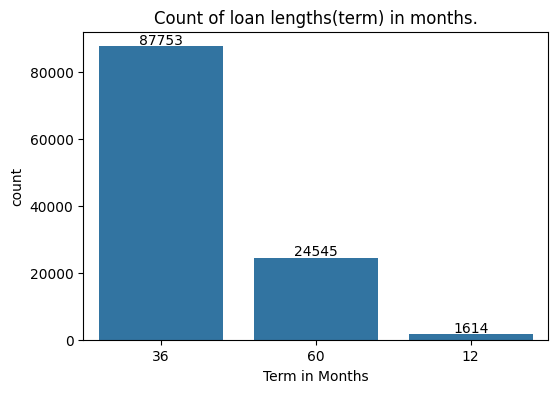

In [15]:
#bar plot of term and count of terms
# Set figure size
plt.figure(figsize = [6, 4]) 
base_color = sns.color_palette()[0]
sns.countplot(x='Term',data=df,color=base_color,order=df['Term'].value_counts().index)
plt.xlabel('Term in Months')
# Adding labels on top of of each bar.
for i in range (df['Term'].value_counts().shape[0]):
    count = df['Term'].value_counts().values[i]
    plt.text(i, count+ 4000, count, ha = 'center', va='top')
plt.title('Count of loan lengths(term) in months.');

The plot shows that more loan term (87753) fall under 36 months, less (24545) fall under 60 months while the least (1614) fall under 12 months. I will try to find out how this obersation correlates with other features


### Borrower APR

Text(0.5, 1.0, 'Distribution of borrower APR larger bin sizes')

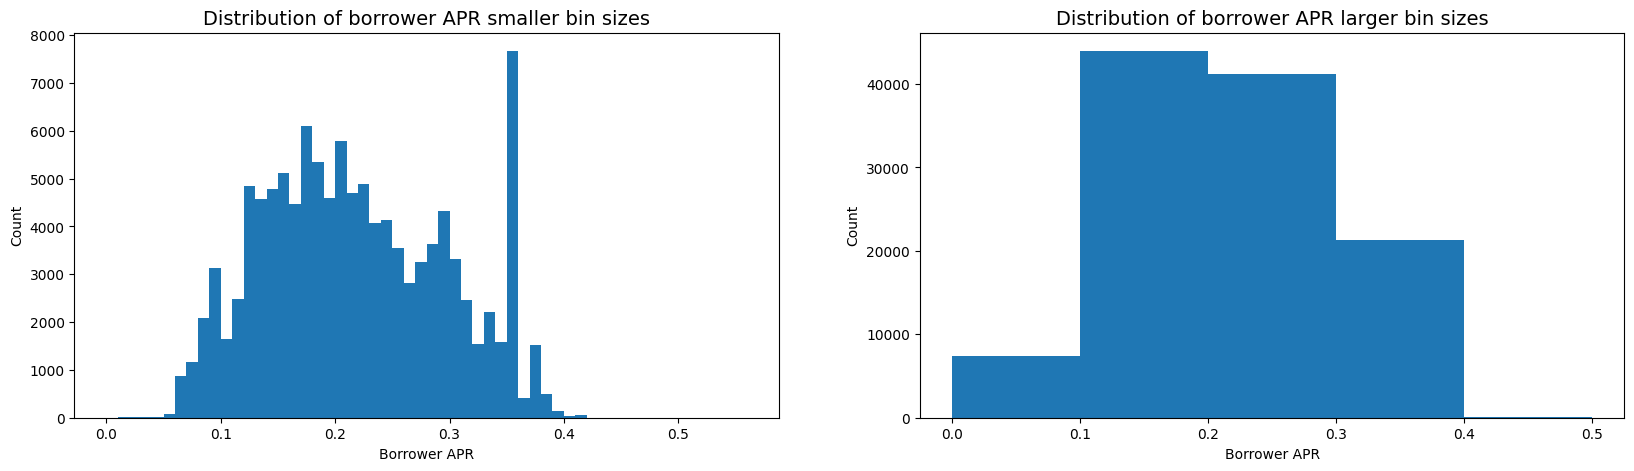

In [16]:
plt.figure(figsize = [20, 5])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
bins = np.arange(0, df.BorrowerAPR.max()+0.05, 0.01)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.ylabel('Count');
plt.title('Distribution of borrower APR smaller bin sizes', fontdict={'size':14})


# center plot: box plot
plt.subplot(1, 2, 2)
bins = np.arange(0, df.BorrowerAPR.max()+0.05, 0.1)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.ylabel('Count');
plt.title('Distribution of borrower APR larger bin sizes', fontdict={'size':14})


The plot shows that borrowers APR has a seemingly random distribution which is somewhat multimodal. the plot on the left shows that there is a peak at 0.08, a peak at 0.18, a peak at 0.3, a peak at 0.36 and another peak at o.38 while the plot on the right shows the peak to be between 0.1 and 0.3. while the plot on the right shows the highest peak at 0.36, the plot on the has the highest peak between 0.1 and 0.2. It futher reveals that most part of the data is between 0.1 and 0.4. This means that the APR is largely between 10 and 40% with a high count around 36%

### Borrower Rate

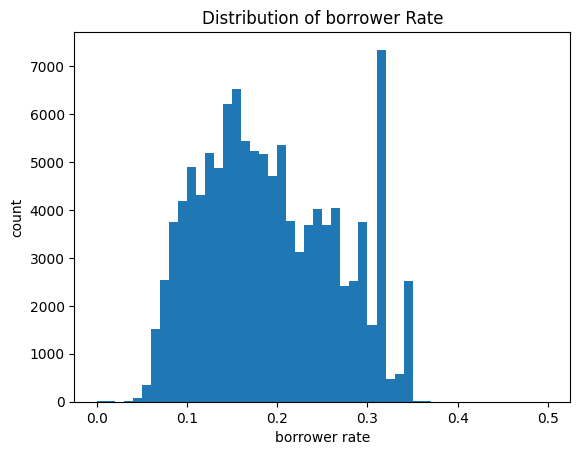

In [17]:
# Plotting histogram.
bins = np.arange(0,df['BorrowerRate'].max()+0.01,0.01) 
plt.hist(x='BorrowerRate', data=df, bins=bins)
plt.title('Distribution of borrower Rate')
plt.xlabel('borrower rate')
plt.ylabel('count');

The borrower rate (borrowers interest rate) shows a distribution that looks like that of the borrowers APR with a peak at at 0.16, a decline and then a sharp peaking at 0.32, recall that this same sharp peaking occured at 0.36 for borrower APR. This is understandable since the borrowers APR consists of the interest rate and other additional fees and since the borrower APR is meant to be higher than the interest rate for a particular loan entry. I will later look into the realtionship between borrowers APR and borrower rate.

### Borrower State

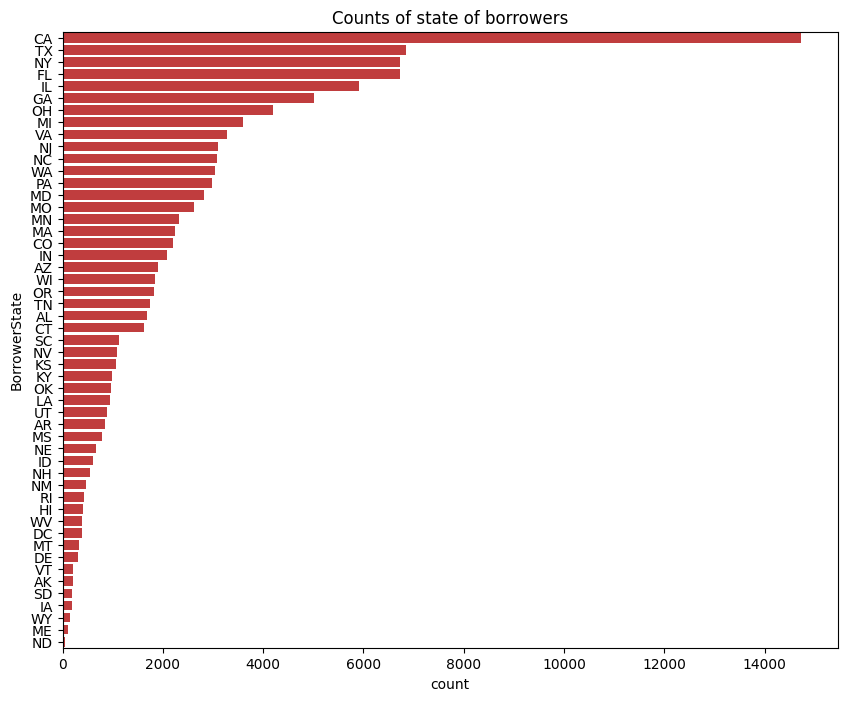

In [18]:
# Plotting countplot.
base_color1 = sns.color_palette()[3]
plt.figure(figsize=(10,8))
sns.countplot(y='BorrowerState', data=df, order=df['BorrowerState'].value_counts().index, color=base_color1)
plt.title('Counts of state of borrowers');

The plot shows that majority of the borrowers are from CA(California) followed by TX(Texas) and then NY(New York). This expected as Claifornia is the most populous state in the US followed by Texas, Florida and then New Your according to [this](https://www.infoplease.com/us/states/state-population-by-rank) report. California also houses the Silicon valley which is a base for many tech startups

### Occupation

In [19]:
#check the listed occupations
df.Occupation.value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

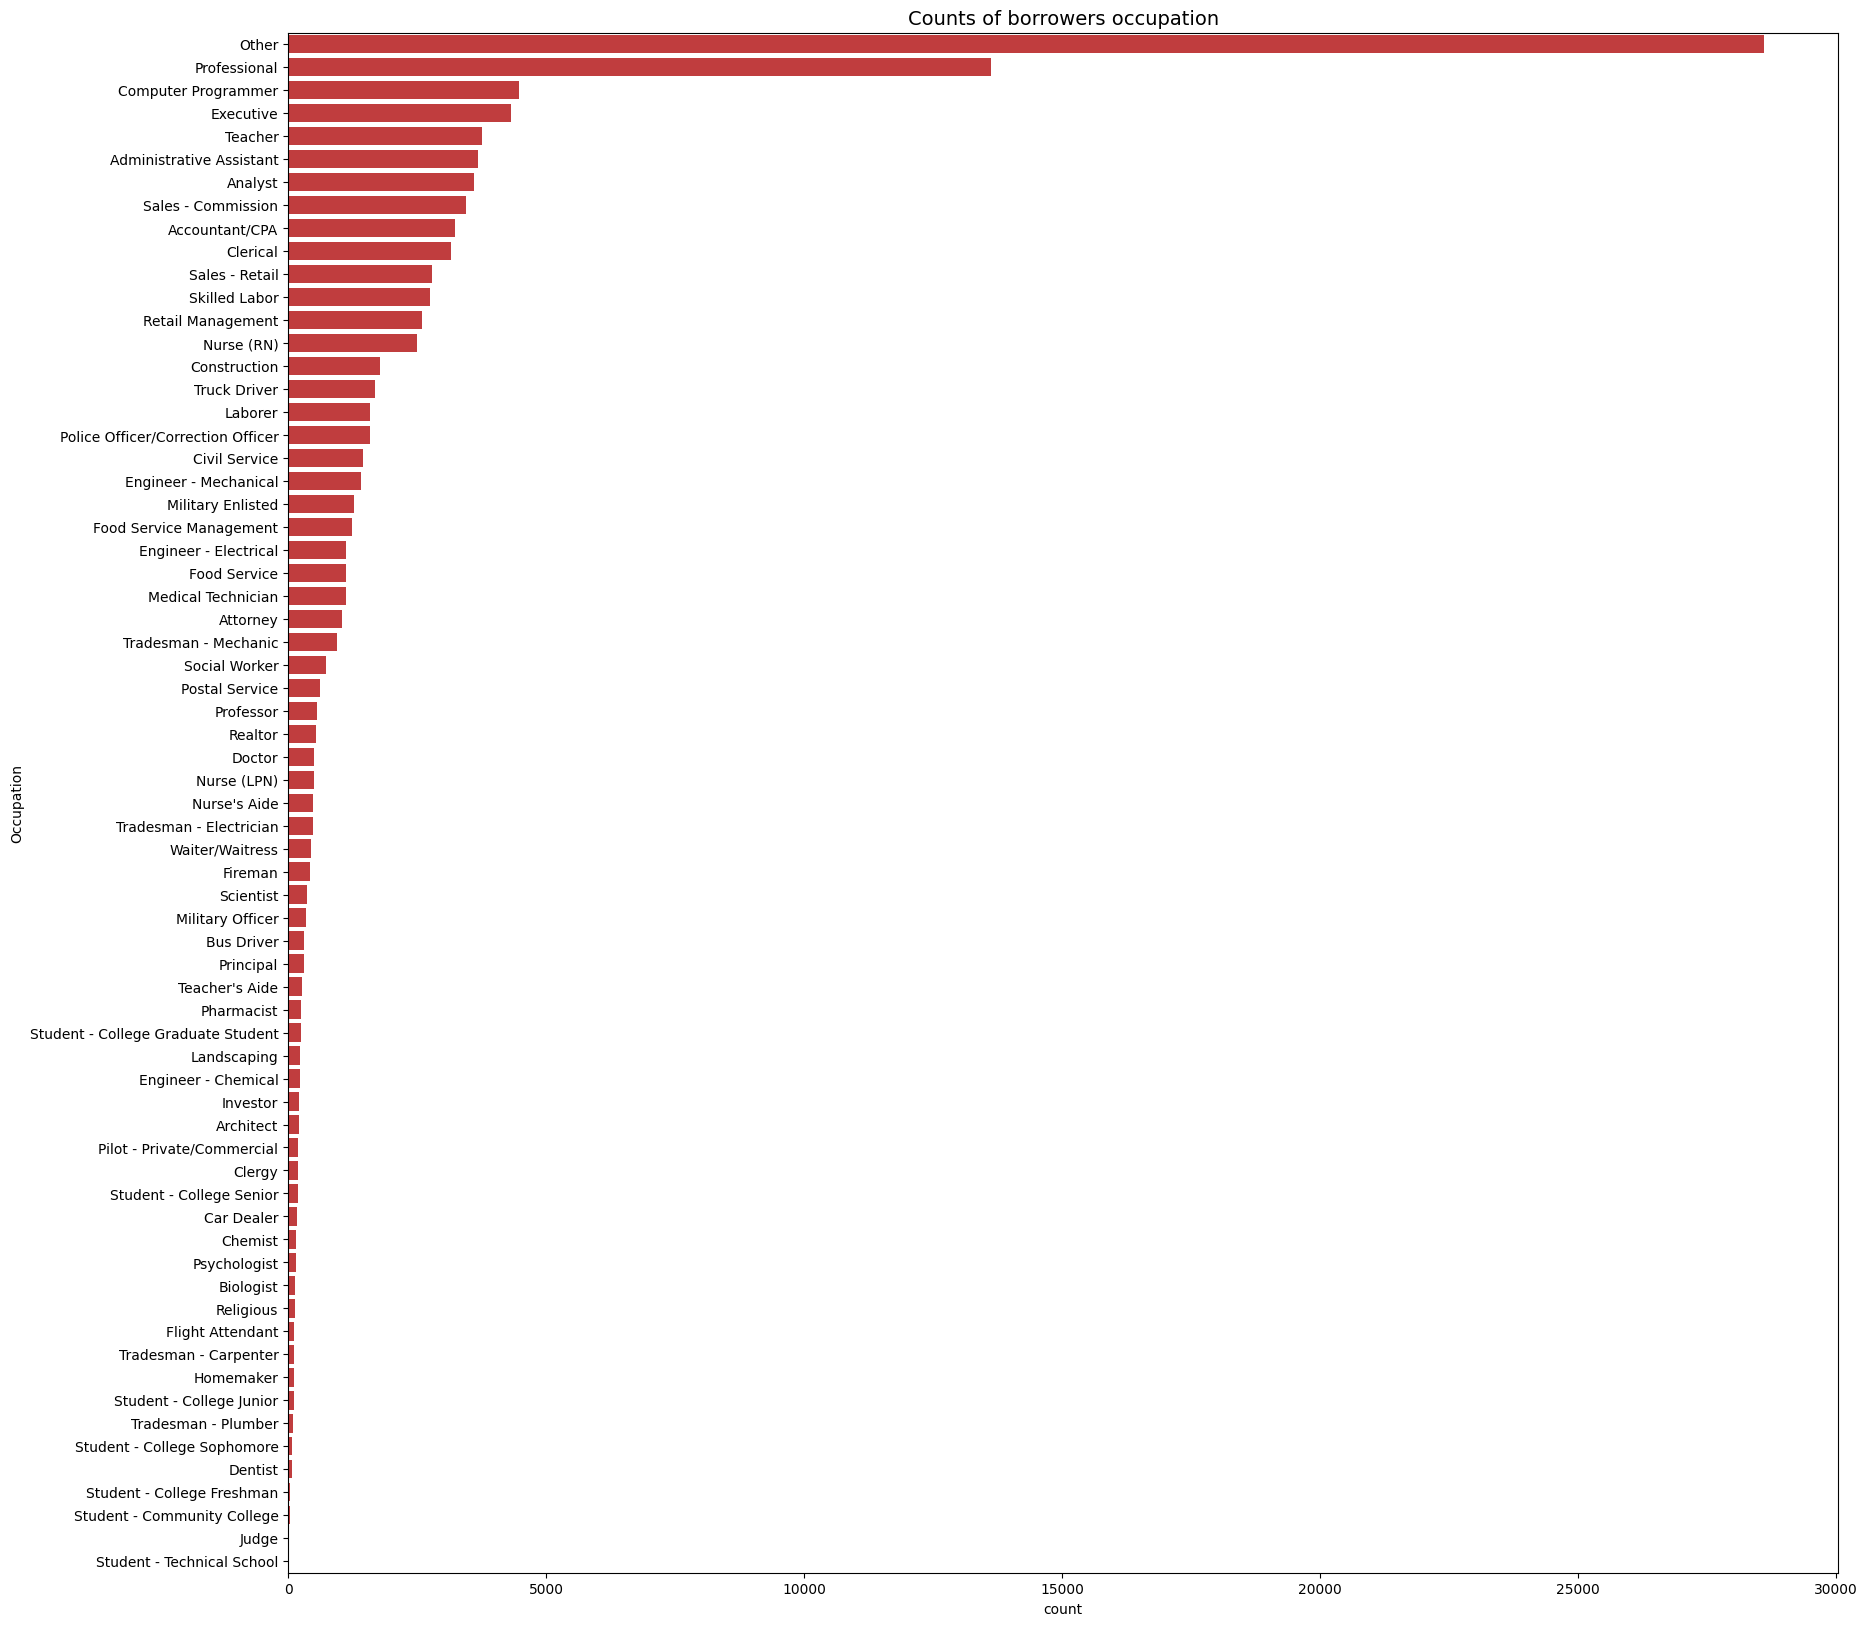

In [20]:
# Plotting countplot.
plt.figure(figsize=(20,20))
sns.countplot(y='Occupation',data=df,color=base_color1, order = df['Occupation'].value_counts().index)
plt.title('Counts of borrowers occupation', fontdict={'size':14});

We can see that from the chart, Professional and Other has the two highest counts for occupation while student of technical school has the lowest count.
Although Other and Professional has the highest count, they are more of a general category of occupation, I will remove them from the list and plot the others.

In [21]:
#occupation without others and professional
occupation_new= df.Occupation[(df.Occupation!='Other' ) & (df.Occupation!='Professional' )]
occupation_new.value_counts()

Computer Programmer            4478
Executive                      4311
Teacher                        3759
Administrative Assistant       3688
Analyst                        3602
                               ... 
Dentist                          68
Student - College Freshman       41
Student - Community College      28
Judge                            22
Student - Technical School       16
Name: Occupation, Length: 65, dtype: int64

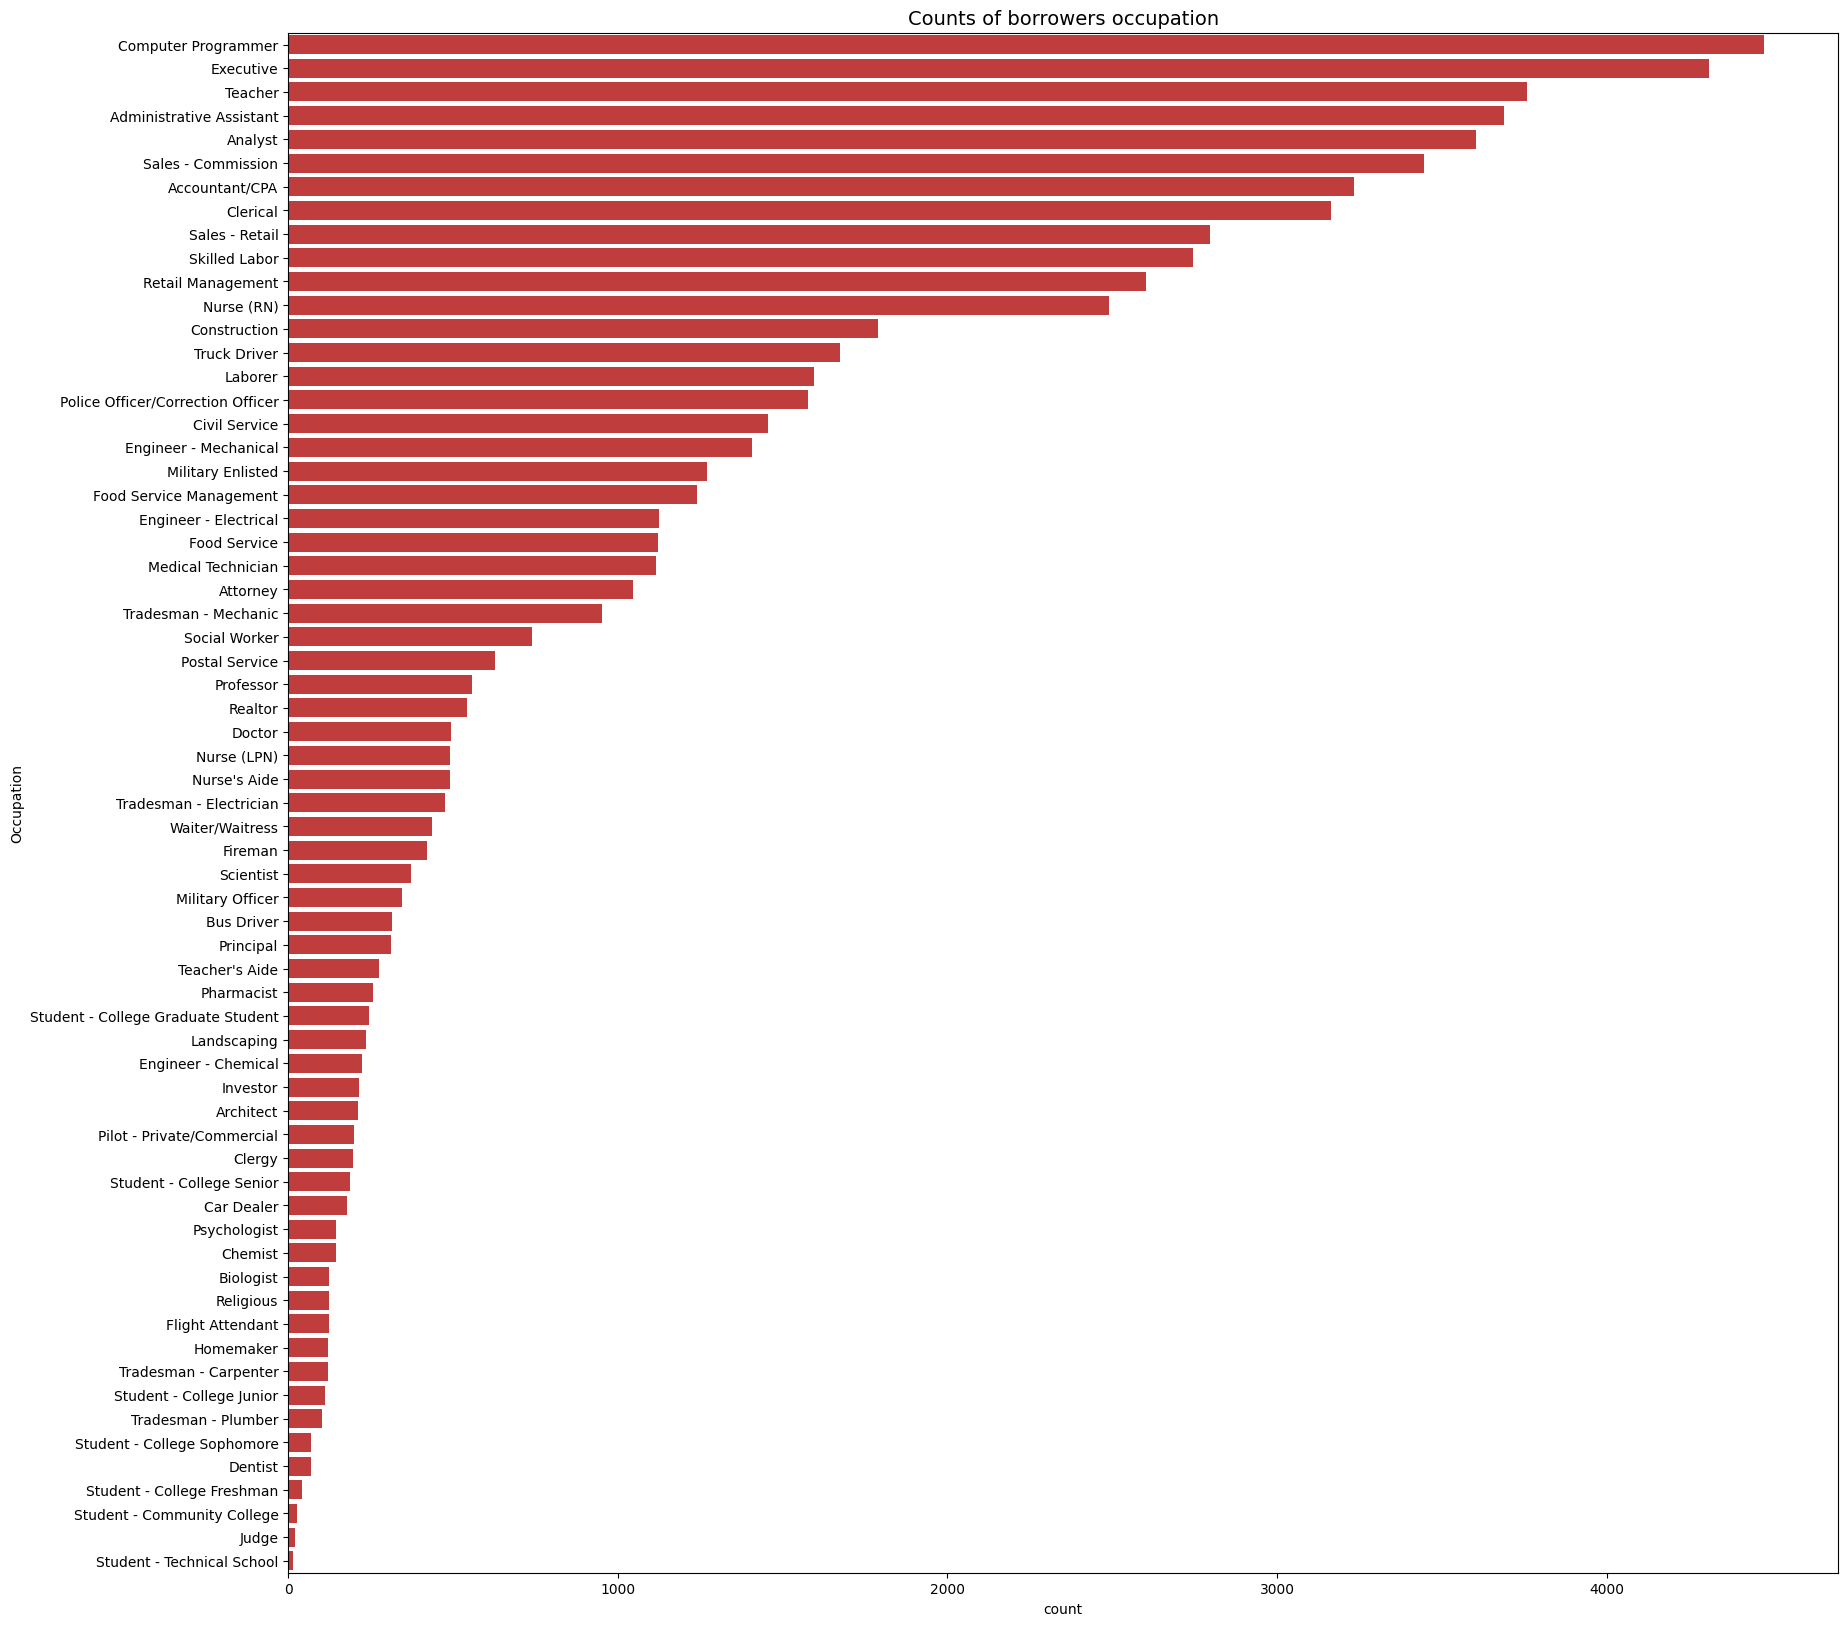

In [22]:
# Plotting countplot.
plt.figure(figsize=(20,20))
sns.countplot(y=occupation_new, data=df,color=base_color1, order = occupation_new.value_counts().index)
plt.title('Counts of borrowers occupation', fontdict={'size':14});

The new plot shows that computer programmers obtained loans the most followed by Executives and then Teachers. Computer programmers might have obtained more loans due to the fact that they run more startups that many other categories especially in the tech category.  

### Employment status

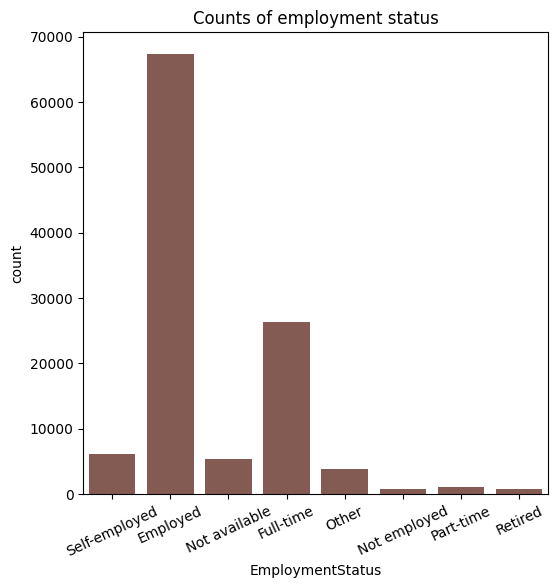

In [23]:
# Plotting countplot.
base_color2 = sns.color_palette()[5]
plt.figure(figsize=(6,6))
sns.countplot(x='EmploymentStatus',data=df,color=base_color2)
plt.xticks(rotation=25)
plt.title('Counts of employment status');

The plot shows that most people who obtained loans the most are employed followed by full-time which is still part of being employed. This is so because loan companies give out loans more to people who can back up their claim with their payslip.

### Monthly loan payment

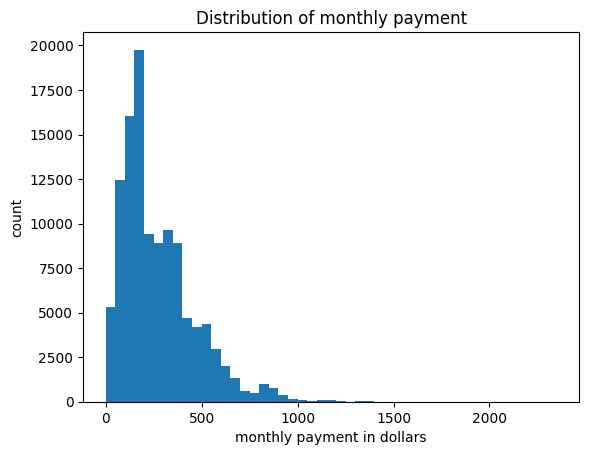

In [24]:
# Plotting histogram.
bins = np.arange(0,df['MonthlyLoanPayment'].max()+100, 50) 
plt.hist(x='MonthlyLoanPayment', data=df, bins=bins)
plt.title('Distribution of monthly payment')
plt.xlabel('monthly payment in dollars')
plt.ylabel('count');

The plot shows a somewhat left skewed distribution for the monthly payment feature with most loanees paying back between 100-400 dollars monthly. On few occassions, we have loanees paying up to 1400 dollars monthly.

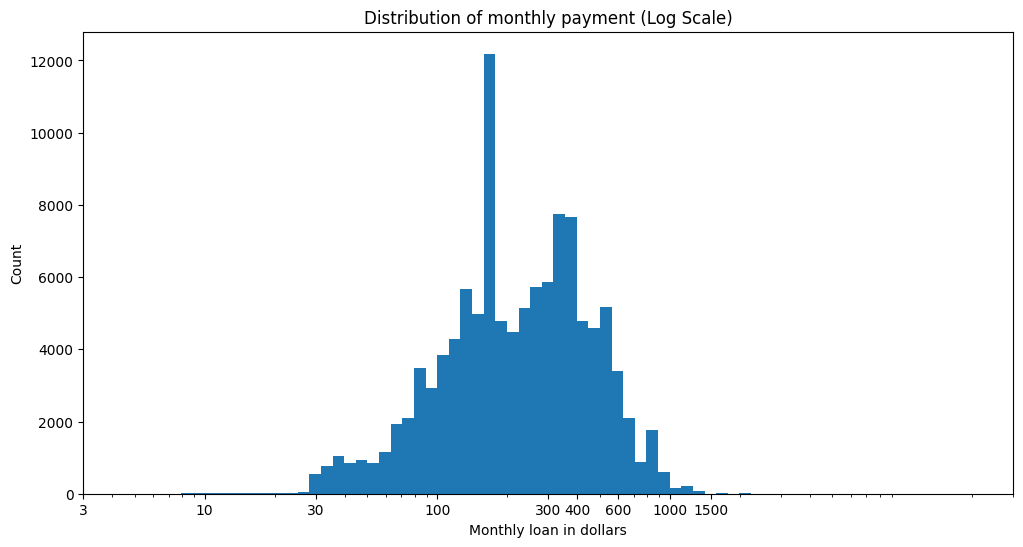

In [25]:
#Plotting histogram by scaling the x-axis to log-type, and changing the axis limit.
plt.figure(figsize=[12,6])
# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(-1, 3.7+0.1, 0.05)

# Generate the x-ticks you want to apply
ticks = [3, 10, 30, 100, 300, 400, 600, 1000, 1500]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# bins = 10**np.arange(-1.07,4.6+0.1,0.01)
# ticks = [0,100,1e3,2e3,3e3,4e3,5e3,10e3,15e3,20e3,25e3,30e3,35e3,40e3]
# labels = ['{}'.format(v)for v in ticks]
plt.hist(x='MonthlyLoanPayment',data=df, bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels);
#plt.xticks(10**(log_trans(np.array([0.001,100,500,1e3,2e3,3e3,4e3,5e3,6e3,7e3,8e3,9e3,10e3,15e3,20e3,25e3,30e3,35e3,40e3]))),['0','100','500','1k','2k','3k','4k','5k','6k','7k','8k','9k','10k','15k','20k','25k','30k','35k','40k'],rotation=25);
plt.xlim(10**(log_trans(3)),10**(log_trans(30000)))
plt.xlabel('Monthly loan in dollars')
plt.ylabel('Count')
plt.title('Distribution of monthly payment (Log Scale)');

As seen clearly now in the above scaled plot, the monthly payment seems to lie between 30 and 1500 dollars a month. This detail was not as clear in the first plot.
I will now look into the distribution of stated monthly income

### Stated Monthly Income

Text(0.5, 1.0, 'Distribution of stated monthly income')

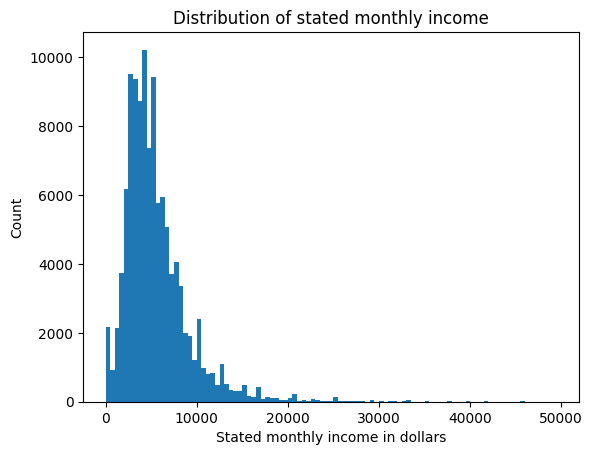

In [26]:
# Distribution of stated monthly income
bins_2 = np.arange(0, 50000, 500)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins=bins_2);
plt.xlabel('Stated monthly income in dollars')
plt.ylabel('Count')
plt.title('Distribution of stated monthly income')

Let's apply some scaling

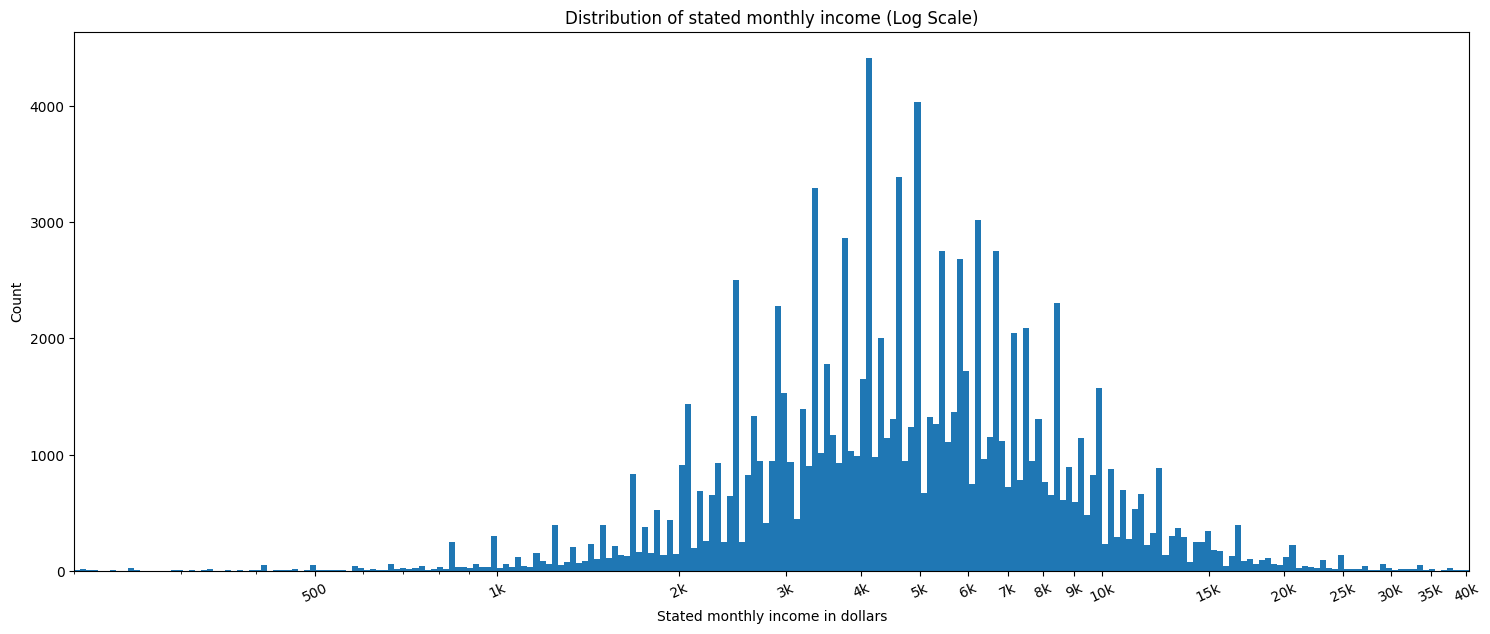

In [27]:
#Plotting histogram by scaling the x-axis to log-type, and changing the axis limit.
plt.figure(figsize=[18,7])
bins = 10**np.arange(-1.07,4.6+0.1,0.01)
ticks = [0,5e2,1e3,2e3,3e3,4e3,5e3,10e3,15e3,20e3,25e3,30e3,35e3,40e3]
labels = ['{}'.format(v)for v in ticks]
plt.hist(x='StatedMonthlyIncome',data=df, bins=bins)
plt.xscale('log')
plt.xticks(10**(log_trans(np.array([0.001,100,500,1e3,2e3,3e3,4e3,5e3,6e3,7e3,8e3,9e3,10e3,15e3,20e3,25e3,30e3,35e3,40e3]))),['0','100','500','1k','2k','3k','4k','5k','6k','7k','8k','9k','10k','15k','20k','25k','30k','35k','40k'],rotation=25);
plt.xlim(10**(log_trans(200)),10**(log_trans(40500)))
plt.xlabel('Stated monthly income in dollars')
plt.ylabel('Count')
plt.title('Distribution of stated monthly income (Log Scale)', fontdict={'size':12});

The plot clearly shows the distribution of stated monthly income to lie between 2k and 25k with peak values arounf 4k and 5k. This clearly shows that most people who earn higher can easily access loan the most compared to those who earn low. This makes sense as earning capacity affects ones ability to pay back.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Borrowers APR was seen to generally lie between 0.1 an 0.4 with two distcint peak occuring at 2.0 corresponding to 20% and 3.6 corresponding to 36% APR. Also the distribution of borrowers APR was seen to be similar to that of Borrowers interest rate (Borrower rate).
There was no unusual point and no further transformation was done

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

An unusual distribution was seen with the occupation count. Computer programmers was seen to have high number of loan entries, One woould think that since this profession are normally highly paid they shouldnt take much loans.

To tidy the data I removed entries where borrowers APR is null and I also excluded 'others' and 'professional' from th elist of occupations in a plot.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Relationship between numerical variables

In [42]:
#Remove outlier values from Stated Monthly Income
df = df[df.StatedMonthlyIncome<=35000]

In [29]:
df.columns

Index(['LoanOriginalAmount', 'Occupation', 'BorrowerAPR',
       'StatedMonthlyIncome', 'BorrowerState', 'Term', 'ProsperRating (Alpha)',
       'EmploymentStatus', 'MonthlyLoanPayment', 'BorrowerRate'],
      dtype='object')

In [30]:
numeric= ['LoanOriginalAmount','BorrowerAPR','StatedMonthlyIncome','Term','MonthlyLoanPayment','BorrowerRate']
categorical=['EmploymentStatus','ProsperRating (Alpha)','Occupation','BorrowerState']

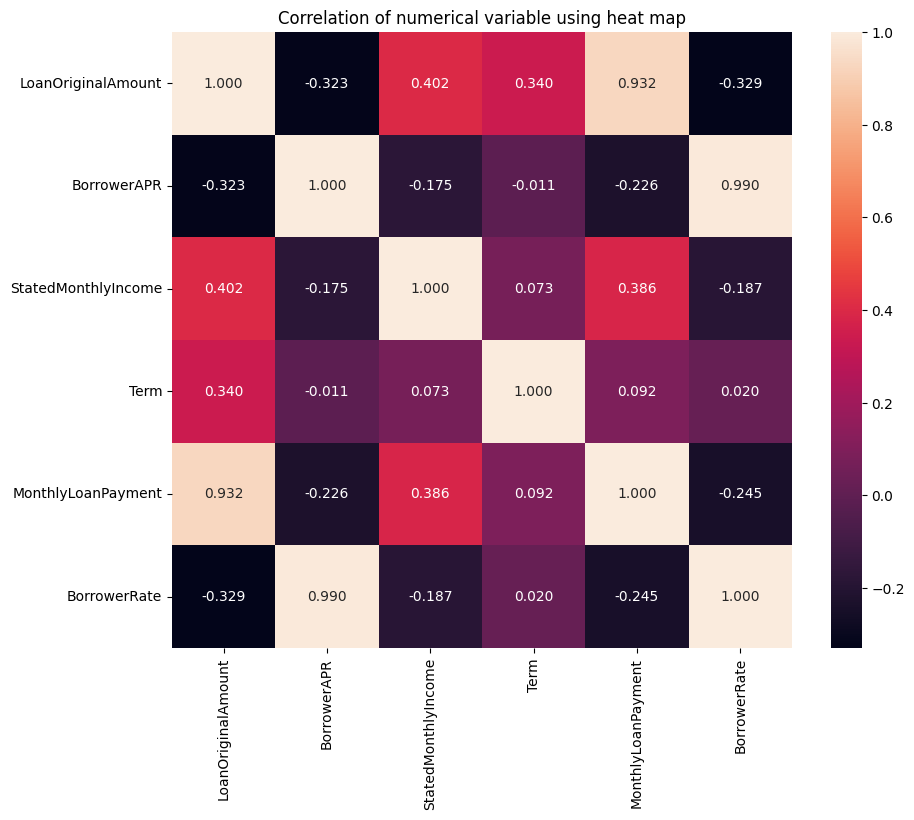

In [31]:
# Plotting a heat map to show the correlation of each numerical variable.
plt.figure(figsize=(10,8))
sns.heatmap(data=df[numeric].corr(),annot=True,fmt='.3f')
plt.title('Correlation of numerical variable using heat map');

A strong positive correlation is observed between loan original amount and monthly payment. Also, there is a strong positive relationship between the borrower APR and borrower Rate. Borrower APR has a negetive correlation with Loan original amount. Borrower Rate has a negative relationship with monthly loan payment. There is a positive relationship between Term and loan origianl amount. there is also a positive relationship between stated income and mothly loan payment

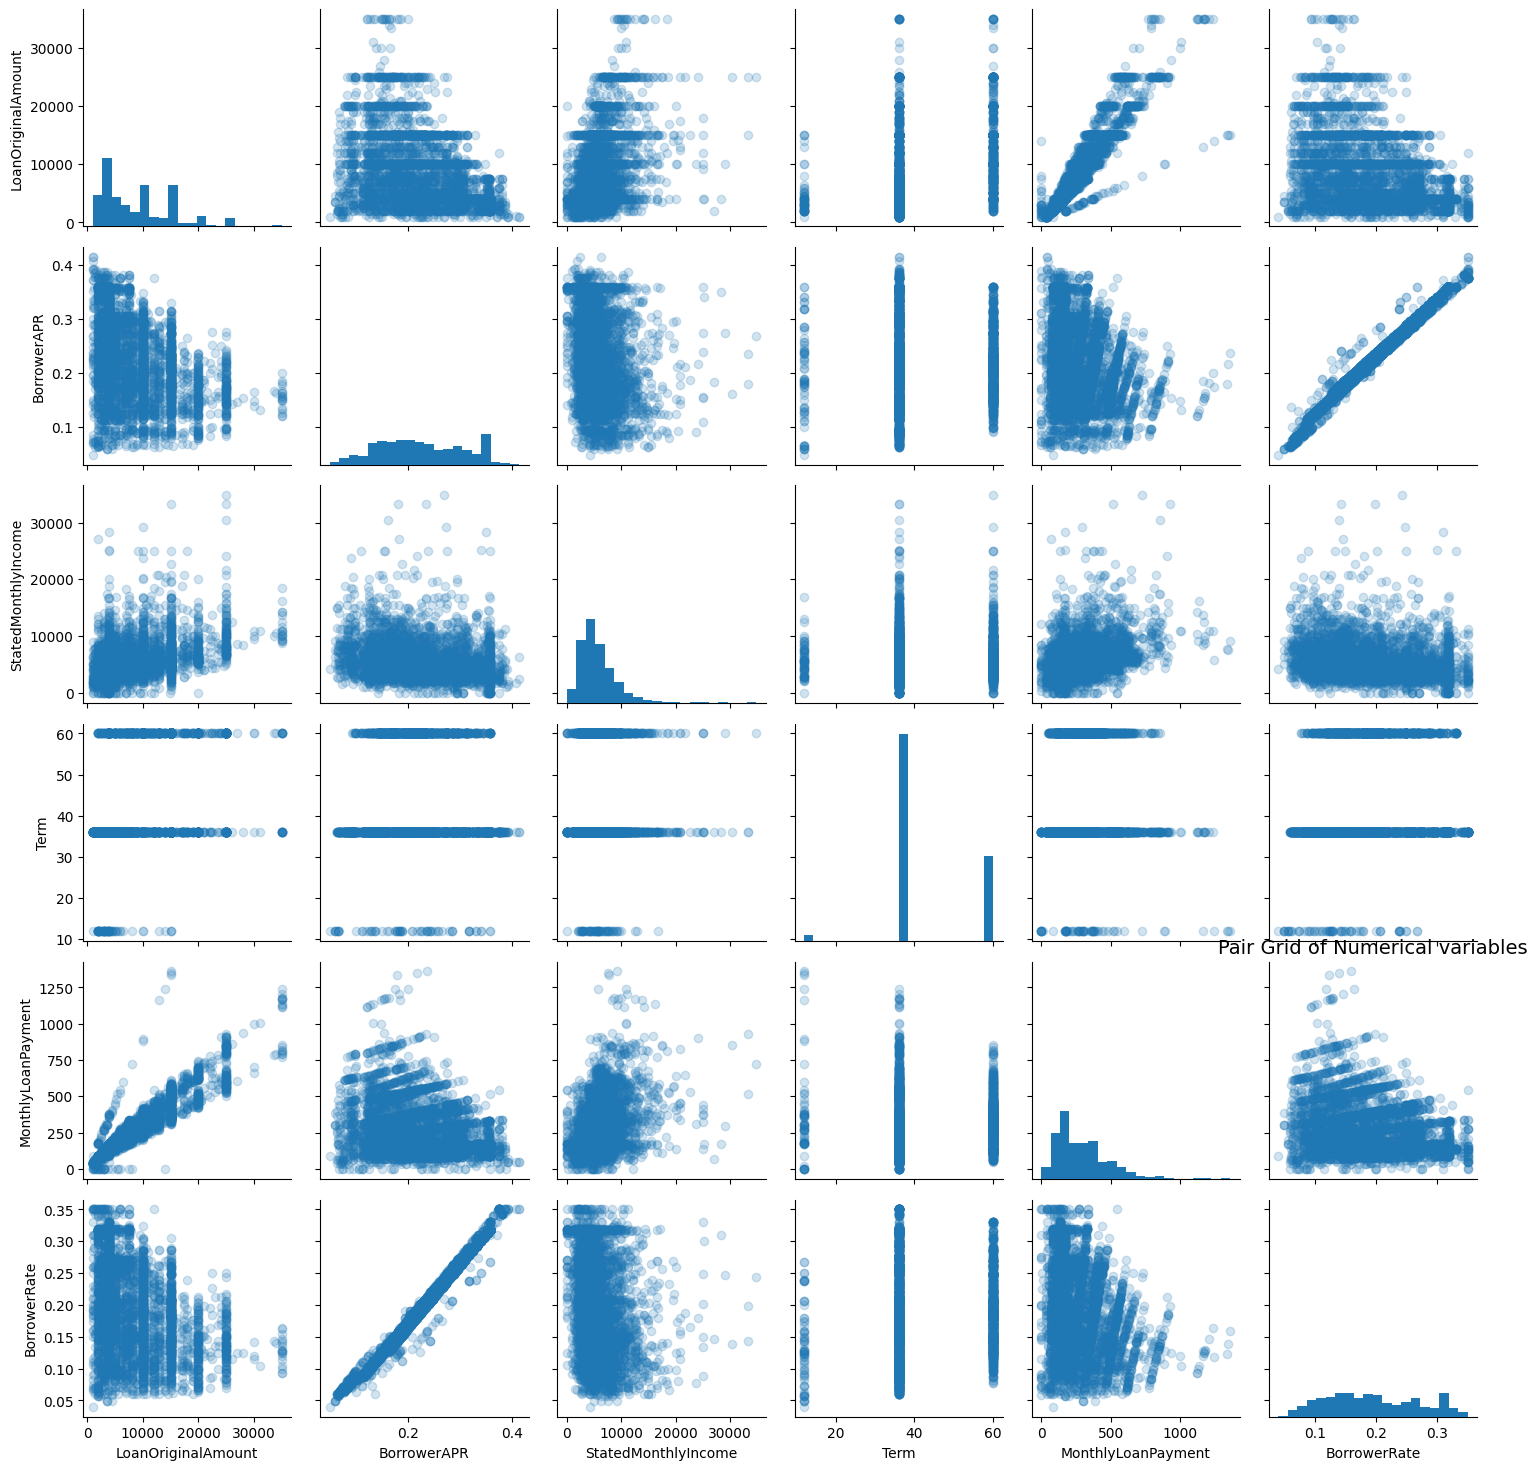

In [32]:
# plot matrix: sample 5000 loans so that plots are clearer.
loan_samp = df.sample(5000)
g = sns.PairGrid(data = loan_samp.dropna(), vars = numeric)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);
samples = np.random.choice(df.shape[0], 10000, replace = False)

The pairgrid reinforces the obsercvation of correlations seen earlier. 

### Relationship between categorical and numerical variables

In [43]:
# Convert ProsperRating to ordered categorical types
rating = ['HR','E','D','C','B','A','AA']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rating)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ordered_cat)

C:\Users\Layo\anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\Layo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Layo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Layo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the 

<Figure size 800x800 with 0 Axes>

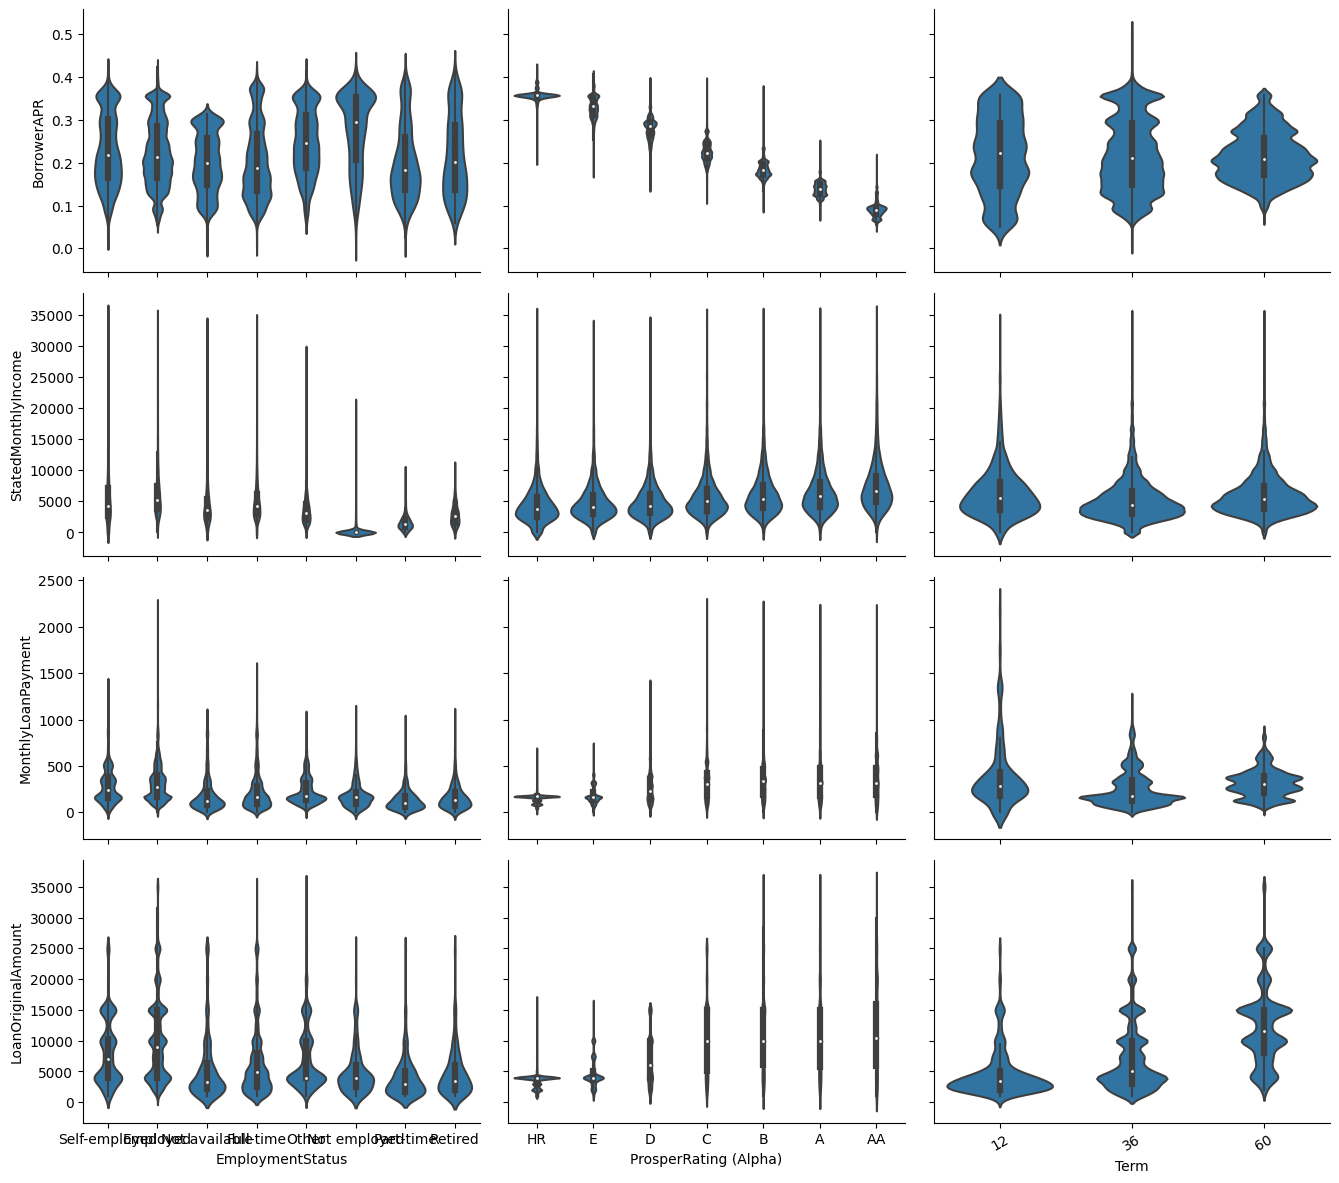

In [35]:
def violin_grid(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.violinplot(x, y, color = default_color)

categories= ['EmploymentStatus','ProsperRating (Alpha)','Term']
plt.figure(figsize = [8, 8])
g = sns.PairGrid(data = df, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome','MonthlyLoanPayment', 'LoanOriginalAmount'], 
                x_vars = categories, size = 3, aspect = 1.5)
g.map(violin_grid);
plt.xticks(rotation=30);

The figure reveals a negative relationship between borrower APR and prosper rating alpha. We can also see a positive relationship between prosperrating alpha and monthly repayment with the lowest rating (HR) having a low monthly repayment amount. Loan original amount also has a somewhat positive relationship with prosper rating and low rating is associated with low original amount.

### Loan Original Amount vs Borrower APR

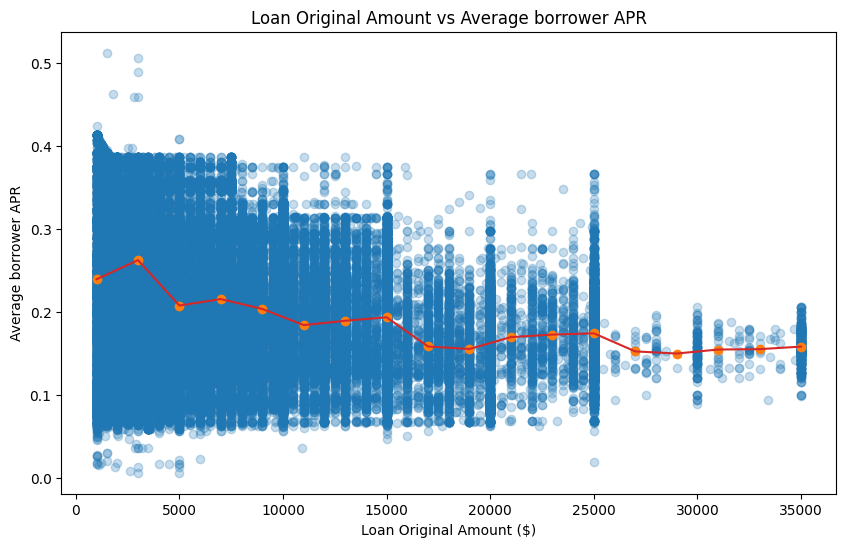

In [37]:
plt.figure(figsize=[ 10, 6])
bins_edges = np.arange(0,40000+100,2000)
bins_center = bins_edges[:-1]+1000
displ_binned = pd.cut(df['LoanOriginalAmount'], bins_edges, include_lowest = True)
comb_mean = df['BorrowerAPR'].groupby(displ_binned).mean()


# Plot the summarized data
line_color = sns.color_palette()[3]
plt.scatter(data=df,x='LoanOriginalAmount',y='BorrowerAPR',alpha=1/4)
plt.scatter(x=bins_center,y=comb_mean)
plt.errorbar(x = bins_center, y = comb_mean, c = line_color)

plt.title('Loan Original Amount vs Average borrower APR')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Average borrower APR');

The graph shows a negative correlation between the loan original amount and Average borrower APR. This is because the APR tends to decrease as the loan amount increases which can be because of some sort of discount on obtaining more loans.

### Term of loan and loan payment amount

Text(0.5, 1.0, 'Term of loan by Monthly loan payment amount')

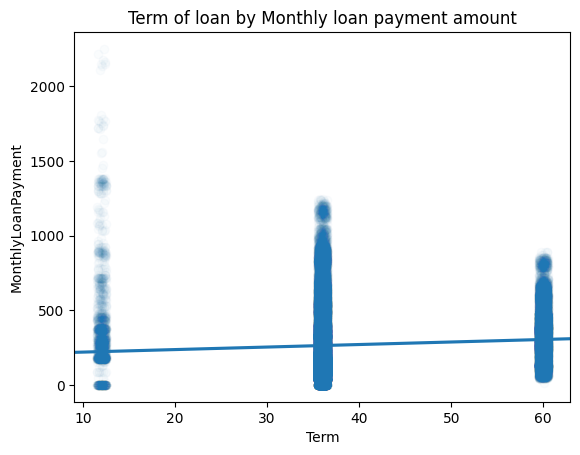

In [39]:
#generate a regplot
sns.regplot(data = df, x = 'Term', y = 'MonthlyLoanPayment', truncate=False, x_jitter=0.5, scatter_kws={'alpha':1/50});
plt.title('Term of loan by Monthly loan payment amount')

The figure shows a positive correlation between term of loan and Monthly payment amoount. This means people who take long term loan pays back higher amount than those who dont. This could also be due to the positive relationship bwetween loan original amount and monthly payment amount.

### Borrower APR vs stated monthly income

Text(0.5, 1.0, 'Borrower APR and Stated Monthly income')

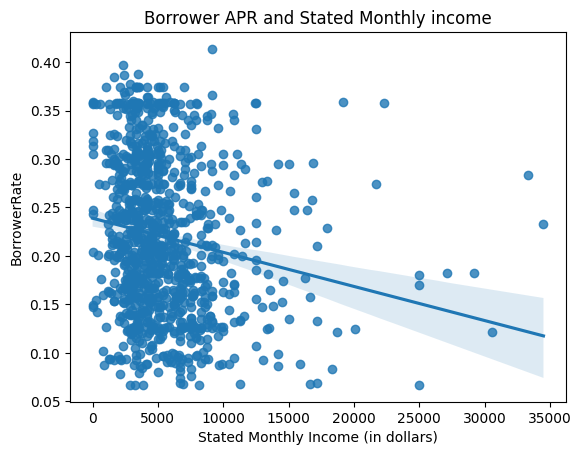

In [44]:
df1=df.sample(1000)
sns.regplot(data = df1, x = 'StatedMonthlyIncome', y = 'BorrowerAPR');
plt.xlabel('Stated Monthly Income (in dollars)')
plt.ylabel('BorrowerRate')
plt.title('Borrower APR and Stated Monthly income')

The plot shows a negative relatiohsip between borrower APR and stated monthly income. This could be due to the fact that there is an existing positive relationship between loan original amount and stated monthly income which inturn has a negative relationship with borrower APR 

### Borrowers APR vs Borrowers rate

C:\Users\Layo\AppData\Local\Temp\ipykernel_15204\1230833888.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['BorrowerState', 'EmploymentStatus', 'Occupation',
       'ProsperRating (Alpha)'],
      dtype='object')
  x_mean = df_fig.mean()['BorrowerAPR']
C:\Users\Layo\AppData\Local\Temp\ipykernel_15204\1230833888.py:5: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['BorrowerState', 'EmploymentStatus', 'Occupation',
       'ProsperRating (Alpha)'],
      dtype='object')
  y_median = df_fig.median()['BorrowerRate']
C:\Users\Layo\AppData\Local\Temp\ipykernel_15204\1230833888.py:6: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; 

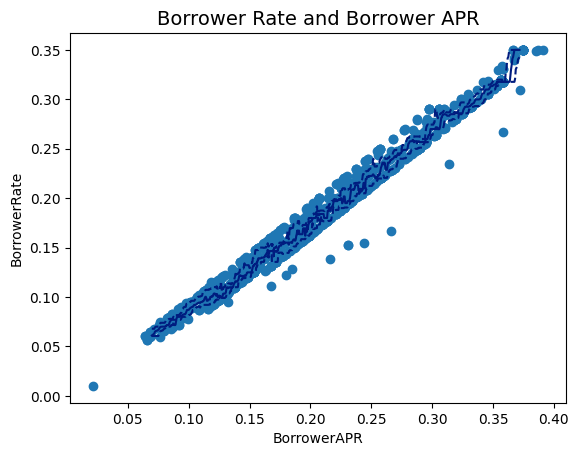

In [33]:
# compute statistics in a rolling window
df_1 = df.sample(1000)
df_fig = df_1.sort_values('BorrowerAPR').rolling(30)
x_mean = df_fig.mean()['BorrowerAPR']
y_median = df_fig.median()['BorrowerRate']
y_q1 = df_fig.quantile(.25)['BorrowerRate']
y_q3 = df_fig.quantile(.75)['BorrowerRate']

# plot the summarized data
base_color = sns.color_palette()[0]
line_color = sns.color_palette('dark')[0]
plt.scatter(data = df_1, x = 'BorrowerAPR', y = 'BorrowerRate')
plt.errorbar(x = x_mean, y = y_median, c = line_color)
plt.errorbar(x = x_mean, y = y_q1, c = line_color, linestyle = '--')
plt.errorbar(x = x_mean, y = y_q3, c = line_color, linestyle = '--')

plt.xlabel('BorrowerAPR')
plt.ylabel('BorrowerRate')
plt.title('Borrower Rate and Borrower APR', fontdict={'size':14});

As seen again here, there is a strong positive relationship between borrower APR and Borrower Rate.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

I oberved a strong positive correlation between borrower APR and Borrower Rate, generally; 
- Borrower APR correlates positively with borrower rate
- Borrower APR correlates negatively with Monthly payment, loan original amount and prosper rating alpha

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
There is a strog positive correlation between loan original amount and monthly payment. This is not extraordinary since it is totally plausible to have high loan takers pay higher amount every month. An interesting positive relationship is however seen between term of loan and monthy repayment amount which suggests long term loan takers pay higher amount everymonth for the repyamnet. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Monthly Payment, Employement Status and Borrowers APR

In [35]:
#create a set of only two employment status (employed and selemployed)
Emp= df[(df.EmploymentStatus== 'Employed') | (df.EmploymentStatus == 'Self-employed')]

In [36]:
Emp.EmploymentStatus.value_counts()

Employed         67209
Self-employed     6094
Name: EmploymentStatus, dtype: int64

C:\Users\Layo\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Layo\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Layo\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


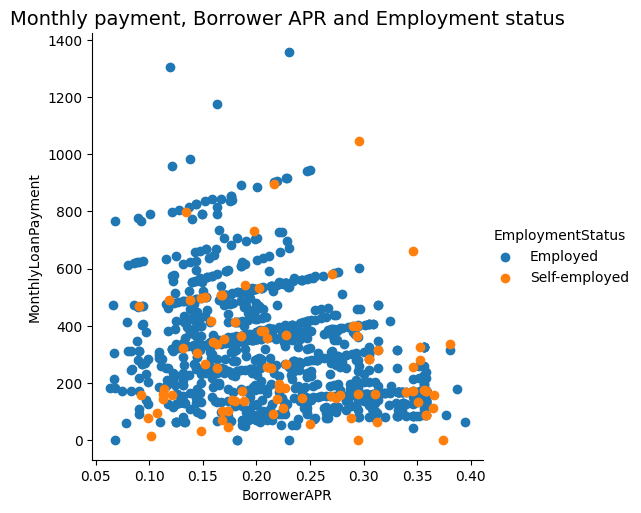

In [37]:
#plot a scatter plot of borrower apr and monthly payment with hue as emplyment status
Emp2= Emp.sample(1000)
g = sns.FacetGrid(data = Emp2, hue = 'EmploymentStatus', size = 5)
g.map(plt.scatter, 'BorrowerAPR', 'MonthlyLoanPayment')
g.add_legend()
plt.title('Monthly payment, Borrower APR and Employment status', fontdict={'size':14});

The plot shows that there is a uniform distribution of APR between self-employed and employed loan applicants. A system that ensures a review where self-employed applicants can have les APR will be something to look into. Also employed people pay more on monthly payment than self-employed applicants as seen in the figure. 

### Loan Amount, Borrower APR and Term

C:\Users\Layo\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Layo\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Layo\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Layo\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


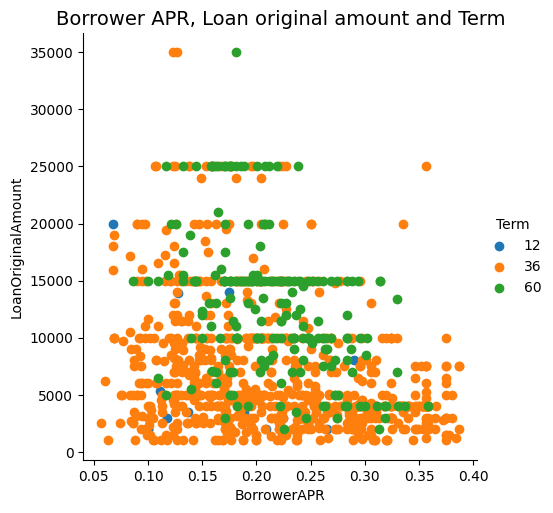

In [45]:
#plot a scatter plot of borrower apr and loan amount
df2= df.sample(1000)
g = sns.FacetGrid(data = df2, hue = 'Term', size = 5)
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount')
g.add_legend()
plt.title('Borrower APR, Loan original amount and Term', fontdict={'size':14});

The plot shows that longer term appears to be related to higher APR. This is interesting as it was ealier observed that term has a low negative relationship with loan amount. This could be due to the cummulative effect of having a large loan term data values which falls under the 36 loan term. The amount of data might have cancelled out the real correlation value hence the previously reported value. The plot definatly suggests that long term is associated with high APR value.

### Employment Status,  Prosper Rating Alpha and Borrower APR

C:\Users\Layo\AppData\Local\Temp\ipykernel_15204\293654993.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cat_means = df.groupby(['EmploymentStatus', 'ProsperRating (Alpha)']).mean()['BorrowerAPR']


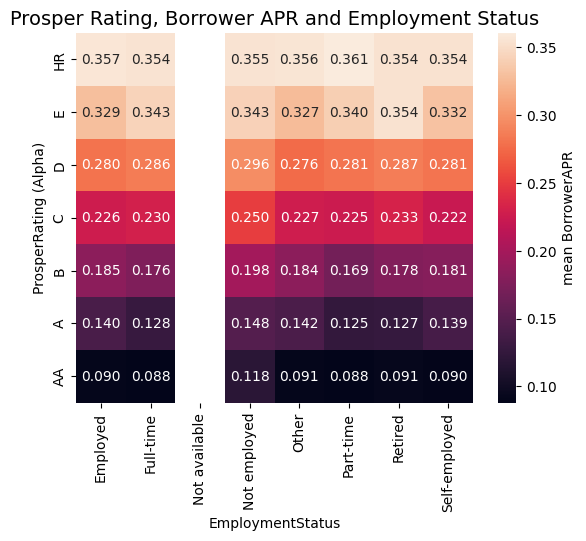

In [46]:
cat_means = df.groupby(['EmploymentStatus', 'ProsperRating (Alpha)']).mean()['BorrowerAPR']
cat_means = cat_means.reset_index(name = 'BorrowerAPR_avg')
cat_means = cat_means.pivot(index = 'ProsperRating (Alpha)', columns = 'EmploymentStatus',
                            values = 'BorrowerAPR_avg')
sns.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean BorrowerAPR'})
plt.title('Prosper Rating, Borrower APR and Employment Status', fontdict={'size':14});

The 2d heat map shows that there is a negative correlation between borrowers APR and Prosper rating as low BorrowerAPR correspond to high prosper rating. The all employement status shows similar correlation at the different prosper rating. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There is a uniform distribution of Borrower APR between employed and self-employed occupation status while employed loan beneficiaries tends to pay more monthly for loan repayment,.

### Were there any interesting or surprising interactions between features?

No surprising interactions

## Conclusions
Three type of anaylysis were carried out namely, univariate, bivariate and multivariate.
Under univariate, it was observed that 36% was the highest point for borrower APR. Programmers were also observed to have more counts for loans than other professions after 'others' and 'professionals' were excluded.
Under Bivariate, A strong relationship was seen between Borrower APR and Borrower rate, Similar relationship was also seen between LoanOriginalAmount and MonthlyLoanPayment. Negative relationships were observed between the feature of interest (Borrowers APR) and LoanOriginal Amount and MonthlyLoanPayment.
Under multivariate, it was observed that both employed and self-employed loan beneficiaries have the same range of APR but more employed people pay higher monthly.
